<a href="https://colab.research.google.com/github/nowshad7/CSE4100and4250/blob/main/Abs_Summ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tqdm import tqdm
import os
from nltk.corpus import stopwords
from tensorflow.keras import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense,LSTM,Bidirectional,Flatten,Dropout,BatchNormalization,Embedding,Input,TimeDistributed
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import plot_model

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
print(tf.__version__)

2.3.0


In [ ]:
from zipfile import ZipFile
file_name = "archive.zip"
with ZipFile(file_name, 'r') as zip: 
  zip.extractall()
  print("Done")

Done


In [ ]:
all_data=[]
Articles_with_stopwords=[]
Articles_without_stopwords=[]
Summaries=[]
stop_words=set(stopwords.words('english'))
for d,path,filenames in tqdm(os.walk('BBC News Summary')):
    for file in filenames:
        if os.path.isfile(d+'/'+file):
            if('Summaries' in d+'/'+file):
                with open(d+'/'+file,'r',errors='ignore') as f:
                    summary=''.join([i.rstrip() for i in f.readlines()])
                    Summaries.append(summary)
                    f.close()
            else:
                with open(d+'/'+file,'r',errors='ignore') as f:
                    Article=''.join([i.rstrip() for i in f.readlines()])
                    Articles_with_stopwords.append(Article)
                    Articles_without_stopwords.append(' '.join([w for w in Article.split() if w not in stop_words]))
                    f.close()

13it [00:00, 40.70it/s]


In [ ]:
print(len(Articles_with_stopwords),len(Articles_without_stopwords),len(Summaries))

2225 2225 2225


In [ ]:
data=pd.DataFrame({'Articles without stop words':Articles_without_stopwords,'Article with stop words': Articles_with_stopwords,'Summary':Summaries})
data.head()

,Articles without stop words,Article with stop words,Summary
0,Hitch holds US box officeWill Smith's first ro...,Hitch holds on to US box officeWill Smith's fi...,Smith's comedy will be the first US movie rele...
1,Fockers keeps US box office leadFilm comedy Me...,Fockers keeps US box office leadFilm comedy Me...,The Incredibles took $300m (£160m) outside the...
2,Rapper Kanye West's shrewd soulUS hip-hop star...,Rapper Kanye West's shrewd soulUS hip-hop star...,Leaving his Chicago art school after only one ...
3,Elvis 'set chart hat-trick'The late US legend ...,Elvis 'set for chart hat-trick'The late US leg...,"A Fool Such As I would become the 1,001st numb..."
4,John Peel replacement show beginsThe permanent...,John Peel replacement show beginsThe permanent...,The permanent replacement for late DJ John Pee...


In [ ]:
data['Articles without stop words'][0]

'Hitch holds US box officeWill Smith\'s first romantic comedy, Hitch, topped North American box office second weekend.Smith plays New York "date doctor" love worries movie, took $31.8m (£16.8m). It held strong challenge new Keanu Reeves sci-fi thriller Constantine opened number two $30.5m (£16.1m) Constantine, based Hellblazer comics, stars Reeves exorcist must send Satan\'s minions back hell. Two family films came next chart, Wayne Wang\'s comedy Because Winn-Dixie, young girl abandoned dog, third position $10.85m (£5.73m).Comedy adventure Son Mask, came number four $7.7m (£4.1m), ahead Oscar favourite Million Dollar Baby five.Smith\'s comedy first US movie released year top $100m (£52.7m) mark. It\'s success continues strong trend Hollwood movie-going year figures popular President\'s Day weekend 13% greater last year. Oscar contenders The Aviator, starring Leonardo DiCaprio Howard Hughes wine-tasting comedy Sideways, held onto positions top 10.'

In [ ]:
for i in range(3):
    print(data['Article with stop words'][i])
    print("---------------------------------------------")

Hitch holds on to US box officeWill Smith's first romantic comedy, Hitch, has topped the North American box office for a second weekend.Smith plays a New York "date doctor" with love worries of his own in the movie, which took $31.8m (£16.8m). It held off a strong challenge from the new Keanu Reeves sci-fi thriller Constantine which opened at number two with $30.5m (£16.1m) Constantine, based on the Hellblazer comics, stars Reeves as an exorcist who must send Satan's minions back to hell. Two family films came next in the chart, with Wayne Wang's comedy Because of Winn-Dixie, about a young girl and an abandoned dog, in third position with $10.85m (£5.73m).Comedy adventure Son of the Mask, came in at number four with $7.7m (£4.1m), just ahead of Oscar favourite Million Dollar Baby at five.Smith's comedy will be the first US movie released this year to top the $100m (£52.7m) mark. It's success continues a strong trend of Hollwood movie-going this year with figures for the popular Preside

In [ ]:
data['Summary'][0]

"Smith's comedy will be the first US movie released this year to top the $100m (£52.7m) mark.Oscar contenders The Aviator, starring Leonardo DiCaprio as Howard Hughes and wine-tasting comedy Sideways, both held onto positions in the top 10.Will Smith's first romantic comedy, Hitch, has topped the North American box office for a second weekend.Comedy adventure Son of the Mask, came in at number four with $7.7m (£4.1m), just ahead of Oscar favourite Million Dollar Baby at five."

In [ ]:
nltk.download('punkt')
sentences = nltk.sent_tokenize(data['Article with stop words'][0])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
sentences

AttributeError: ignored

In [ ]:
import re

In [ ]:
contraction_mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",

                           "didn't": "did not", "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",

                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",

                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",

                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",

                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",

                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",

                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",

                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",

                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",

                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",

                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",

                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",

                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",

                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",

                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",

                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",

                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",

                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",

                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",

                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",

                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",

                           "you're": "you are", "you've": "you have"}

In [ ]:
def clean_text(text):
    
    #text=text.lower()
    text=' '.join([contraction_mapping[i] if i in contraction_mapping.keys() else i for i in text.split()])
    text=re.sub(r'\(.*\)',"",text)
    text=re.sub("'s","",text)
    text=re.sub('"','',text)
    text=' '.join([i for i in text.split() if i.isalpha()])
    text=re.sub('[^a-zA-Z]'," ",text)
    
    return text

#BERT Embedinngs

In [ ]:
data['Article with stop words']=data['Article with stop words'].apply(clean_text)
data['Articles without stop words']=data['Articles without stop words'].apply(clean_text)

In [ ]:
data['Article with stop words'][0]

'Hitch holds on to US box officeWill Smith first romantic has topped the North American box office for a second plays a New York date doctor with love worries of his own in the which took It success continues a strong trend of Hollwood this year with figures for the popular President Day weekend greater than last Oscar contenders The starring Leonardo DiCaprio as Howard Hughes and comedy both held onto positions in the top'

In [ ]:
import nltk
nltk.download('punkt')
sentences = nltk.sent_tokenize(data['Article with stop words'][0])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
sentences.shape

AttributeError: ignored

#End Embedding 

In [ ]:
data['Article with stop words']=data['Article with stop words'].apply(clean_text)
data['Articles without stop words']=data['Articles without stop words'].apply(clean_text)
data['Summary']=data['Summary'].apply(clean_text)
data['Summary']='<START> '+data['Summary']+' <END>'

In [ ]:
data['Article with stop words'][0]

'blair labour pmtony blair has become the labour party prime premier has marked his day in the overtaking the combined length of harold wilson two terms during the and if mr blair wins the next election and fulfils his promise to serve a full third he will surpass margaret thatcher years by the end of in mr blair became the youngest premier of the when he came to power at the age of the last prime minister to be installed at a younger age was lord who was a year his junior in blair other political firsts include becoming the first labour leader to win two successive full terms in power after the labour and the birth of the fourth on was the first child born to a serving prime minister in more than the last downing street dad was lord john russell in labour won a huge majority of over the conservatives in but mr blair has since been criticised by many in his own the war in iraq and reforms of the health service and education system have provoked dissent from chancellor of the exchequer 

In [ ]:
data['Articles without stop words'][0]

'blair labour pmtony blair become labour party prime premier marked day overtaking combined length harold wilson two terms if mr blair wins next election fulfils promise serve full third surpass margaret thatcher years end in mr blair became youngest premier came power age the last prime minister installed younger age lord year junior blair political firsts include becoming first labour leader win two successive full terms power labour and birth fourth first child born serving prime minister the last downing street dad lord john russell labour huge majority conservatives mr blair since criticised many the war iraq reforms health service education system provoked dissent chancellor exchequer mr became britain chancellor modern times former labour leader lord kinnock said chancellor would best placed take mr when asked future leadership told itv waterfront that contest long way away occur prime tony decides he is subscribed wants i think main contender gordon man virtually unmatched capa

In [ ]:
data['Summary'][0]

'<START> both mr brown and mr blair rose to prominence when lord kinnock led labour between and labour leader lord kinnock said the chancellor would be best placed to take over from mr blair has become the labour party prime won a huge majority of over the conservatives in but mr blair has since been criticised by many in his own chancellor of the exchequer under mr became britain chancellor of modern times in mr blair became the youngest premier of the when he came to power at the age of <END>'

In [ ]:
X_train,X_val,Y_train,Y_val=train_test_split(data['Article with stop words'],data['Summary'],test_size=0.3,random_state=29)
print(len(X_train),len(Y_train))
print(len(X_val),len(Y_val))

1557 1557
668 668


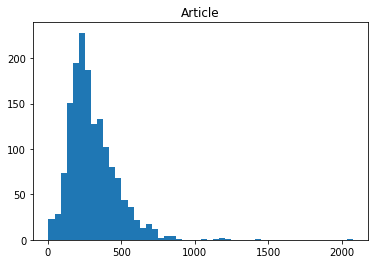

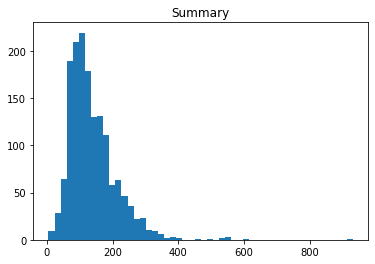

In [ ]:
art_len=[len(i.split()) for i in X_train]
sum_len=[len(i.split()) for i in Y_train]
plt.hist(art_len,bins=50)
plt.title('Article')
plt.show()
plt.hist(sum_len,bins=50)
plt.title('Summary')
plt.show()

In [ ]:
max_art_len=500
max_sum_len=100

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
article_tokenizer=Tokenizer(oov_token='<UNK>')
article_tokenizer.fit_on_texts(X_train)
tokenized_X_train=article_tokenizer.texts_to_sequences(X_train)
tokenized_X_val=article_tokenizer.texts_to_sequences(X_val)

In [ ]:
art_vocab_size=len(article_tokenizer.word_index)+1

In [ ]:
padded_X_train=pad_sequences(tokenized_X_train,maxlen=max_art_len,padding='post',truncating='post')
padded_X_val=pad_sequences(tokenized_X_val,maxlen=max_art_len,padding='post',truncating='post')

In [ ]:
print(padded_X_train.shape,padded_X_val.shape)

(1557, 500) (668, 500)


In [ ]:
summary_tokenizer=Tokenizer(oov_token='<UNK>')
summary_tokenizer.fit_on_texts(Y_train)
tokenized_Y_train=summary_tokenizer.texts_to_sequences(Y_train)
tokenized_Y_val=summary_tokenizer.texts_to_sequences(Y_val)

In [ ]:
sum_vocab_size=len(summary_tokenizer.word_index)+1

In [ ]:
padded_Y_train=pad_sequences(tokenized_Y_train,maxlen=max_sum_len,padding='post',truncating='post')
padded_Y_val=pad_sequences(tokenized_Y_val,maxlen=max_sum_len,padding='post',truncating='post')

In [ ]:
print(padded_Y_train.shape,padded_Y_val.shape)

(1557, 100) (668, 100)


In [ ]:
print(padded_Y_train[1].size)

100


In [ ]:
reverse_art_index=article_tokenizer.index_word
reverse_sum_index=summary_tokenizer.index_word
sum_wordindex=summary_tokenizer.word_index

In [ ]:
encoder_inputs=Input(shape=(max_art_len,))
encoder_emb=Embedding(art_vocab_size,100,trainable=True,name='Encoder_Embedding_layer')(encoder_inputs)
encoder_lstm1=LSTM(300,return_sequences=True,return_state=True,name='Encoder_LSTM1')
enclstm1_outputs,enclstm1_h,enclstm1_c=encoder_lstm1(encoder_emb)


decoder_inputs=Input(shape=(None,))
decoder_em=Embedding(sum_vocab_size,100,trainable=True,name='Decoder_Embedding_layer')
decoder_emb=decoder_em(decoder_inputs)

decoder_lstm1=LSTM(300,return_sequences=True,return_state=True,name='Decoder_LSTM1')
declstm1_output,declstm1_h,declstm1_c=decoder_lstm1(decoder_emb,initial_state=[enclstm1_h,enclstm1_c])

output_layer=TimeDistributed(Dense(sum_vocab_size,activation='softmax',name='softmax'))
output=output_layer(declstm1_output)

model=Model([encoder_inputs,decoder_inputs],output)

model.summary()

Model: "model_10"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_9 (InputLayer)            [(None, 500)]        0                                            
__________________________________________________________________________________________________
input_10 (InputLayer)           [(None, None)]       0                                            
__________________________________________________________________________________________________
Encoder_Embedding_layer (Embedd (None, 500, 100)     2124900     input_9[0][0]                    
__________________________________________________________________________________________________
Decoder_Embedding_layer (Embedd (None, None, 100)    1389500     input_10[0][0]                   
___________________________________________________________________________________________

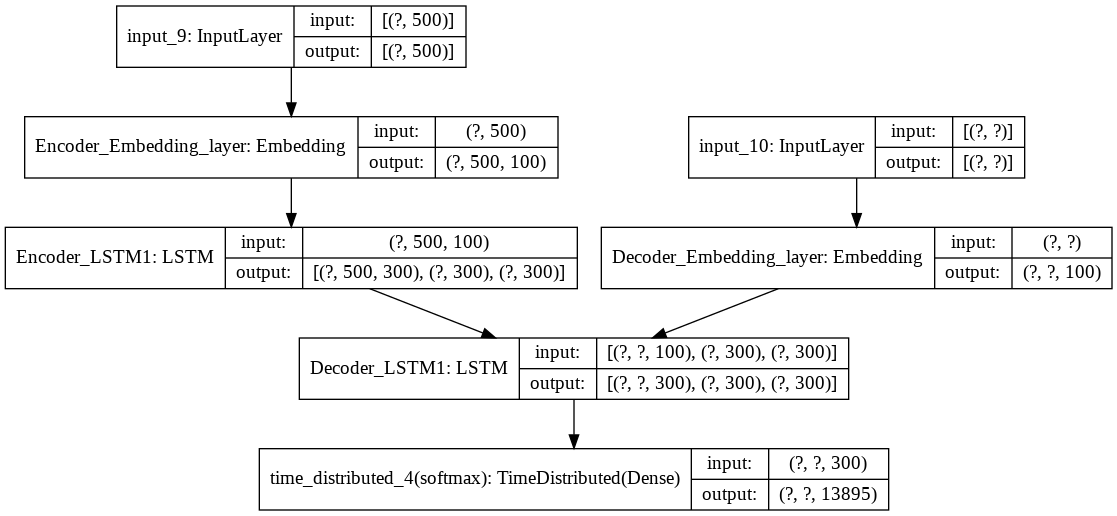

In [ ]:
plot_model(model,show_shapes=True)

In [ ]:
model.compile(optimizer='Adam',loss='sparse_categorical_crossentropy')

In [ ]:
model.fit([padded_X_train,padded_Y_train[:,:-1]],padded_Y_train[:,1:],
          epochs=1,
          validation_data=([padded_X_val,padded_Y_val[:,:-1]],padded_Y_val[:,1:]),
          batch_size=64)

Train on 1557 samples, validate on 668 samples
1557/1557 [==============================] - 253s 163ms/sample - loss: 8.1762 - val_loss: 6.8370


In [ ]:
infencoder_model=Model(inputs=[encoder_inputs],outputs=[enclstm1_outputs,enclstm1_h,enclstm1_c])

infdecoder_model_state_input_h=Input(shape=(300,),name='infdec_I1')
infdecoder_model_state_input_c=Input(shape=(300,),name='infdec_I2')

infdeclstm1_output,infdec_h,infdec_c=decoder_lstm1(decoder_emb,initial_state=[infdecoder_model_state_input_h,
                                                                                                infdecoder_model_state_input_c
                                                                                               ])

infdec_output=output_layer(infdeclstm1_output)                         

infdecoder_model=Model(inputs=[decoder_inputs]+[infdecoder_model_state_input_h,infdecoder_model_state_input_c],
                       outputs=[infdec_output]+[infdec_h,infdec_c])

In [ ]:
infencoder_model.summary()

Model: "model_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 500)]             0         
_________________________________________________________________
Encoder_Embedding_layer (Emb (None, 500, 100)          2124900   
_________________________________________________________________
Encoder_LSTM1 (LSTM)         [(None, 500, 300), (None, 481200    
Total params: 2,606,100
Trainable params: 2,606,100
Non-trainable params: 0
_________________________________________________________________


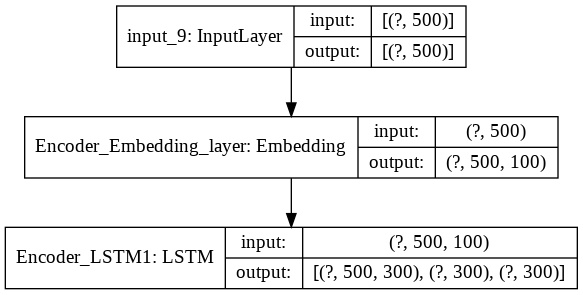

In [ ]:
plot_model(infencoder_model,show_shapes=True)

In [ ]:
infdecoder_model.summary()

Model: "model_12"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_10 (InputLayer)           [(None, None)]       0                                            
__________________________________________________________________________________________________
Decoder_Embedding_layer (Embedd (None, None, 100)    1389500     input_10[0][0]                   
__________________________________________________________________________________________________
infdec_I1 (InputLayer)          [(None, 300)]        0                                            
__________________________________________________________________________________________________
infdec_I2 (InputLayer)          [(None, 300)]        0                                            
___________________________________________________________________________________________

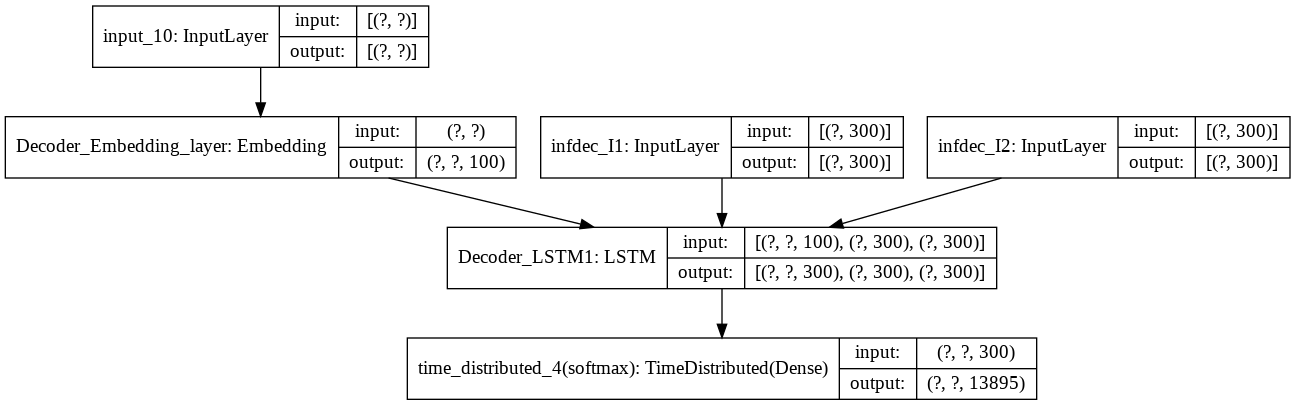

In [ ]:
plot_model(infdecoder_model,show_shapes=True)

In [ ]:
def decode_sequence(inp_seq):
    
    enc_out,enc_h,enc_c=infencoder_model.predict(inp_seq)
    
    tar_seq=np.zeros((1,1))
    tar_seq[0,0]=sum_wordindex['start']
    
    stop_loop=False
    decoded_string=''
    
    while not stop_loop:
       
        dec_out,dec_h,dec_c=infdecoder_model.predict([tar_seq]+[enc_h,enc_c])
        
        tar_token_index=np.argmax(dec_out[0,-1,:])
        tar_token_word=sum_wordindex[tar_token_index]
        
        if tar_token_word =='end' or len(decoded_string)>=max_art_len:
            
            stop_loop=True
        else:
            decoded_string+=tar_token_word
            
            tar_seq=np.zeros((1,1))
            tar_seq[0,0]=tar_token_index
            
            
            enc_h=dec_h
            enc_c=dec_c
            
    return decoded_string

In [ ]:
def seq2art(inp_seq):
    
    art=''
    
    for i in range(len(inp_seq)):
        
        if inp_seq[i]==0:
            break
        art+=reverse_art_index[inp_seq[i]]+' '
        
    return art


def seq2sum(inp_seq):
    
    summary=''
    
    for i in range(len(inp_seq)):
        
        if inp_seq[i]==0:
            break
        word=reverse_sum_index[inp_seq[i]]
        summary+=word+' '
            
    return summary

In [ ]:
print('Example Articel : '+'\n',seq2art(padded_X_val[2]))
print('Example Summary : '+'\n',seq2sum(padded_Y_val[2]))
print('Predicted Summary : '+'\n',decode_sequence(padded_X_val[2])

SyntaxError: ignored